In [2]:
import numpy as np
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

classes = [0,1,2,3,4,5,6,7,8,9,10,13,14,15]

result_dir = "/home/olle/PycharmProjects/LODE/feature_segmentation/trained_model/ensemble_curated_corrected"

record_perf = os.path.join(result_dir, "record_performance.csv")
record_perf_pd = pd.read_csv(record_perf)

idv_path = os.path.join("/home/olle/PycharmProjects/LODE/feature_segmentation/trained_model", 
                        "inter_doctor_variation", 
                        "idv_iou_comparison.csv")
idv_pd = pd.read_csv(idv_path)

In [3]:
## load data
f1_pd = pd.read_csv(os.path.join(result_dir, "clf_report.csv")).T
f1_pd.columns = f1_pd.iloc[0]
f1_pd.drop(axis=0, index=["Unnamed: 0"], inplace=True)
f1_pd = f1_pd.reset_index().rename(columns={"index": "class"})

feature_filter = (f1_pd["class"] != "class 0") & (f1_pd["class"] != "class 15") & (f1_pd["class"] != "class 14")
metric_filter = (f1_pd["class"] != "accuracy") & (f1_pd["class"] != "macro avg") & (f1_pd["class"] != "weighted avg")

f1_pd_filtered = f1_pd[feature_filter & metric_filter]

f1_pd_long = f1_pd_filtered.melt(id_vars=["class"], value_vars=["precision","recall","f1-score"],var_name=["metric"])

## IRF; SRF, PM; EM

Text(0, 0.5, 'f1-score')

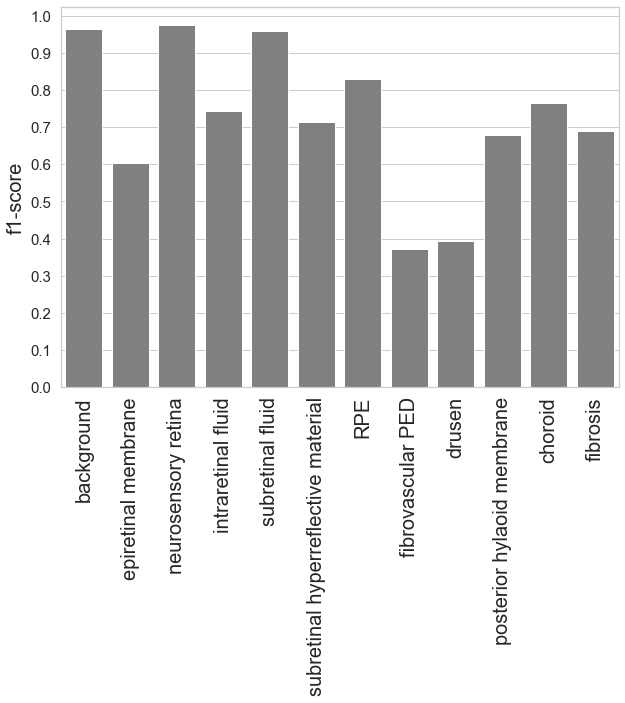

In [35]:
f1scores = [0.963567408, 0.6029228856, 0.9760755483, 
            0.7443336355, 0.959271416, 0.7125867195, 0.8285968533
            ,0.3728186756, 0.3928830792, 0.6786796364, 0.7657868202
            ,0.6896411425]


plt.figure(figsize=(10,7))
x = [0,1,2,3,4,5,6,7,8,9,10,11]
sns.set_theme(style="whitegrid")
sns.barplot(x=x, y=f1scores, color="grey")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], 
           labels=["background", "epiretinal membrane", "neurosensory retina", "intraretinal fluid", 
                   "subretinal fluid", "subretinal hyperreflective material", "RPE", "fibrovascular PED",
                   "drusen", "posterior hylaoid membrane", "choroid", "fibrosis"],
          rotation=90,fontsize=20)
plt.yticks(ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], labels=["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", 
                                        "0.6", "0.7","0.8", "0.9", "1.0"],fontsize=15)
plt.ylabel("f1-score",fontsize=20)



## Per record analysis

In [200]:
feature_records

,record,8_iou
8,4206_L_20151208_434371001_13.png,0.000000
11,76510_Right_20160406_16.png,0.000000
16,5091_R_20150720.png,0.000000
18,7561_R_20160202_443734001_17.png,0.000000
33,36093_L_20150326_386300001_28.png,0.000000
19,295655_L_20170822_563504001_40.png,0.091787
31,2106_R_20160707_475740001_28.png,0.139423
32,86737_R_20171128.png,0.189313
27,43106_R_20141111.png,0.282759
13,319355_L_20160315.png,0.330579


In [189]:
feature = 8
feature_records = record_perf_pd[["record", f"{feature}_iou"]].dropna().sort_values(by=f"{feature}_iou")

feature_records[feature_records[f"{feature}_iou"] > feature_records[f"{feature}_iou"].quantile(0.75)].sample(1)

,record,8_iou
13,319355_L_20160315.png,0.330579


In [199]:
feature_records[feature_records[f"{feature}_iou"] == feature_records[f"{feature}_iou"].quantile(0.5)]

,record,8_iou


In [191]:
feature_records[feature_records[f"{feature}_iou"] <= feature_records[f"{feature}_iou"].quantile(0.25)].sample(1)

,record,8_iou
8,4206_L_20151208_434371001_13.png,0.0


## SRHM, Fv-PED, Drusen, Choroid, Fibrosis

Text(0.5, 1.0, 'IOU for 4 high perforing features')

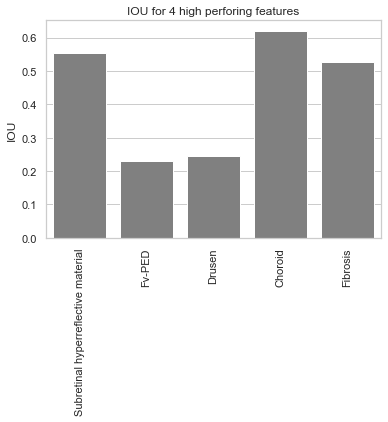

In [140]:
ious = [
5.535026943802925370e-01,
2.291193181818181879e-01,
2.444645277903298719e-01,
6.204655992911686235e-01,
5.262994473079550817e-01
]

x = [1,3,4,6,9]
sns.set_theme(style="whitegrid")
sns.barplot(x=x, y=ious, color="grey")
plt.xticks(ticks=[0,1,2,3,4], 
           labels=["Subretinal hyperreflective material", "Fv-PED", "Drusen", "Choroid", "Fibrosis"],
          rotation=90)

plt.ylabel("IOU")
plt.title("IOU for 4 high perforing features")



## Per record analysis

In [141]:
record_perf_pd.head()

,Unnamed: 0,record,0_iou,0_precision,0_recall,0_f1_score,0_support,1_iou,1_precision,1_recall,...,4_f1-score,5_f1-score,6_f1-score,7_f1-score,8_f1-score,9_f1-score,10_f1-score,13_f1-score,14_f1-score,15_f1-score
0,0,273218_R_20150528.png,0.871502,0.872275,0.998985,NaN,16742,0.281879,0.933333,0.287671,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.636298,0.876538,0.991939,0.998313
1,1,333295_R_20170517.png,0.981388,0.982648,0.998695,NaN,29883,0.504425,0.786207,0.584615,...,0.0,0.0,0.862541,0.0,0.0,0.000000,0.925571,0.000000,0.997359,0.990456
2,2,354106_R_20170601.png,0.967012,0.998041,0.968851,NaN,33131,NaN,0.000000,0.000000,...,0.0,0.0,0.833094,0.0,0.0,0.832625,0.929558,0.000000,0.988241,0.985143
3,3,61989_R_20170914_569274001_15.png,0.996567,0.999970,0.996597,NaN,33791,0.000000,0.000000,0.000000,...,0.0,0.0,0.872908,0.0,0.0,0.000000,0.000000,0.000000,0.997554,0.997783
4,4,135590_L_20171201_586379001_17.png,0.997699,0.998500,0.999197,NaN,38629,0.000000,0.000000,0.000000,...,0.0,0.0,0.898936,0.0,0.0,0.806540,0.000000,0.000000,0.996791,0.978883


In [157]:
feature = 5
feature_records = record_perf_pd[["record", f"{feature}_iou"]].dropna().sort_values(by=f"{feature}_iou")

feature_records[feature_records[f"{feature}_iou"] > feature_records[f"{feature}_iou"].quantile(0.75)].sample(1)

,record,5_iou
22,196106_L_20170307.png,0.298464


In [121]:
feature_records[feature_records[f"{feature}_iou"] == feature_records[f"{feature}_iou"].quantile(0.5)]

,record,5_iou
5,24844_R_20170502.png,0.0
6,48212_Right_20170919_570040001.png,0.0
9,22757_L_20130307_260204001_11.png,0.0
14,47557_R_20161220.png,0.0
15,64530_L_20170518.png,0.0
19,295655_L_20170822_563504001_40.png,0.0
20,76510_Right_20160715_26.png,0.0


In [127]:
feature_records[feature_records[f"{feature}_iou"] <= feature_records[f"{feature}_iou"].quantile(0.25)].sample(1)

,record,5_iou
19,295655_L_20170822_563504001_40.png,0.0


## Inter doctor variation analysis

In [37]:
f5 = idv_pd.labels == 5
f7 = idv_pd.labels == 7
f8 = idv_pd.labels == 8
f10 = idv_pd.labels == 10
f13 = idv_pd.labels == 13

idv_oi_pd = idv_pd[f5|f7|f8|f10|f13]

In [38]:
di = {"ben": "1", "johannes": "2", "michael": "3"}
idv_oi_pd.replace({"evaluator": di}, inplace=True)

/home/olle/miniconda3/envs/visualization/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Text(0, 0.5, 'f1-score')

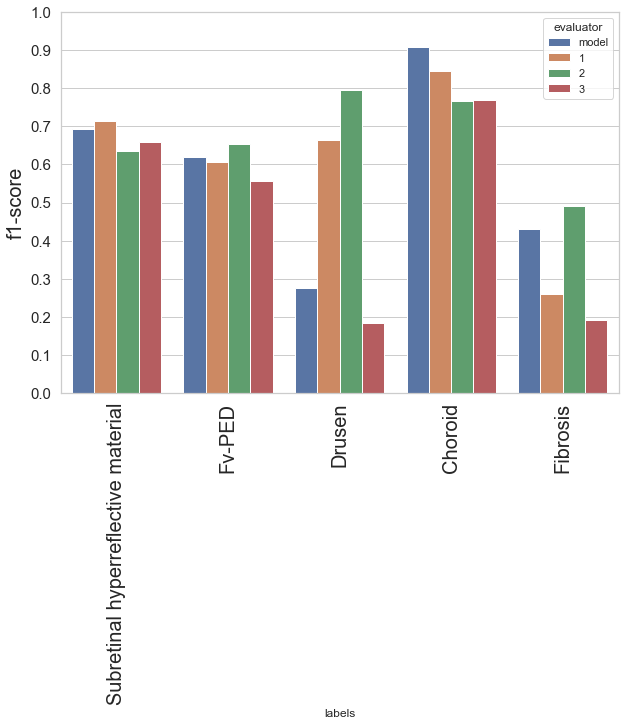

In [41]:
plt.figure(figsize=(10,7))

sns.barplot(x="labels", y="iou", data=idv_oi_pd, hue="evaluator")
plt.xticks(ticks=[0,1,2,3,4], 
           labels=["Subretinal hyperreflective material", "Fv-PED", "Drusen", "Choroid", "Fibrosis"],
          rotation=90, fontsize=20)


plt.yticks(ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], labels=["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", 
                                        "0.6", "0.7","0.8", "0.9", "1.0"],fontsize=15)
plt.ylabel("f1-score",fontsize=20)

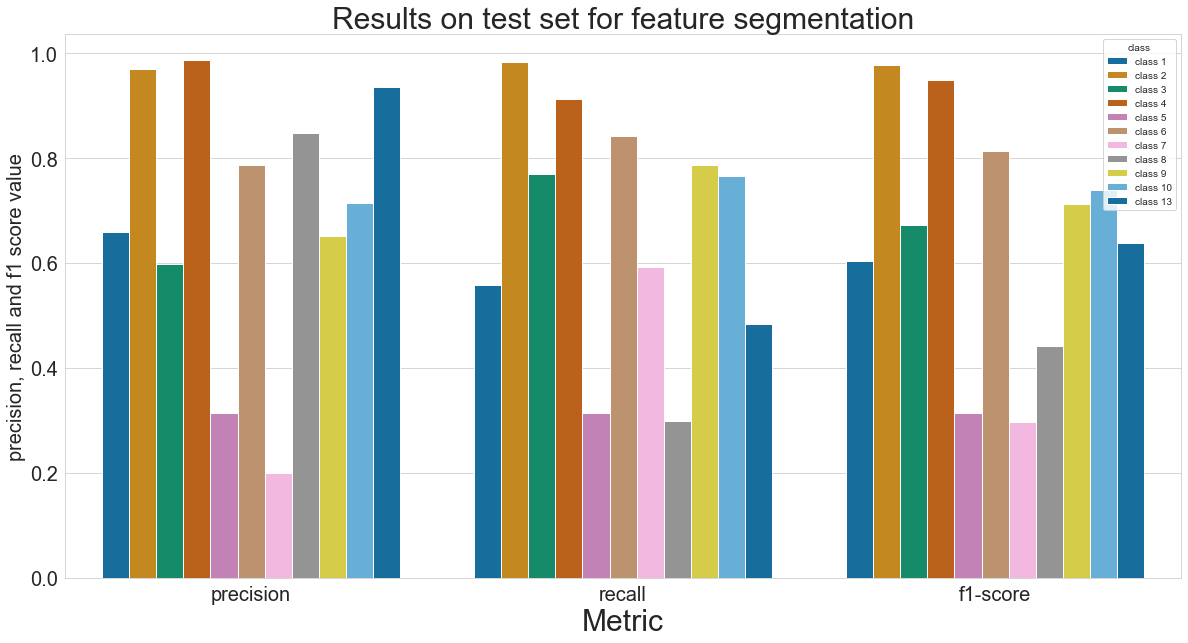

In [8]:
import seaborn as sns
plt.figure(figsize=(20,10))

sns.set_style("whitegrid")

b = sns.barplot(x="metric", y="value", hue="class", data=f1_pd_long, palette="colorblind")
b.axes.set_title("Results on test set for feature segmentation",fontsize=30)
b.set_xlabel("Metric",fontsize=30)
b.set_ylabel("precision, recall and f1 score value",fontsize=20)
b.tick_params(labelsize=20)

#plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
#plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title


Text(114.0, 0.5, 'True')

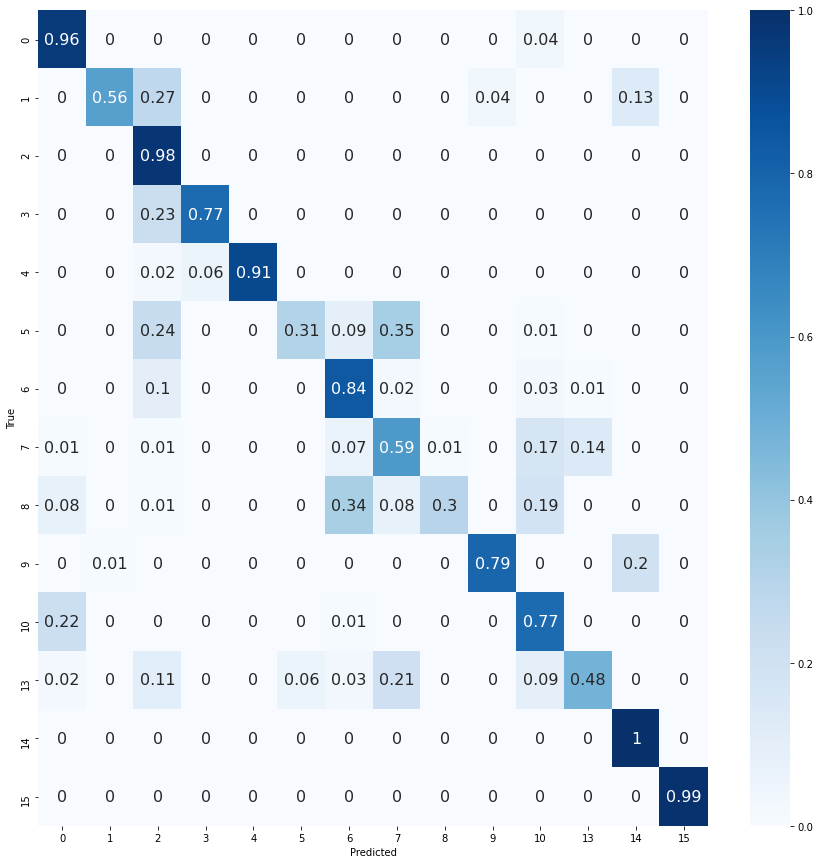

In [10]:
plt.figure(figsize=(15,15))

cm = np.loadtxt(os.path.join(result_dir, "test_cm.txt"))
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
cm = cm.round(2)
labels = [0,1,2,3,4,5,6,7,8,9,10,13,14,15]
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, xticklabels=labels, yticklabels=labels,
           cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("True")